In [1]:
from Landscapes import *
from Experiment import Make_Lon
import numpy as np

In [2]:


def loc_avg_fitness(loc, bit_fits, our_dirich, reps=100):
    
    return sum([get_fitness(loc,bit_fits,our_dirich) for i in range(reps)])/reps



def get_fitness(current_loc, bit_fits, our_dirichlet):
    
    bits = bit_fits.loc["".join([str(i) for i in current_loc])].fitness
    weights = our_dirichlet.rvs()[0]
                                
    return sum([i*j for i,j in zip(bits,weights)])

def bit_fitness(landscape, N, K):

    permutations = []
    bit_fits = []
    all_perms = list(itertools.product([0,1],repeat=N))
    for perm in all_perms:
        w_sub_i = []
        
        #Loop through all N
        for currIndex in np.arange(N):
            #get the fitness indices from each k based upon local gene values
            localgenes = perm[currIndex:currIndex+K+1]
            #loop through to next if were are near the nth index
            if currIndex+K+1 > N:
                localgenes = np.append(localgenes,perm[0:currIndex-(N-K)+1])
            #get index fitness  is stored at
            interactIndex = ((2**(np.arange(K+1)*(localgenes)))*localgenes).sum()
            #update fitness
            w_sub_i.append(landscape[currIndex,interactIndex])
        permutations.append("".join([str(i) for i in perm]))
        bit_fits.append(w_sub_i)
        
    a = {"fitness":pd.Series(bit_fits,index=permutations),
         "Location":pd.Series(all_perms,index=permutations)}
    return pd.DataFrame(a)


def random_walker(step_count, bit_fitnesses,our_dirich, N):

    #Set random starting position
    currPosition = (np.random.rand(N)>0.5).astype(int)

    #Get first fitness value
    FitnessHistory=[loc_avg_fitness(currPosition,bit_fitnesses, our_dirich)]
    for j in range(step_count):
        #Take a step by picking a random gene to change
        toChange = random.randint(0,N-1)
        #this changes 0 to 1 and 1 to zero
        currPosition[toChange] = abs(currPosition[toChange]-1)
        #Append to fitness data
        FitnessHistory.append(loc_avg_fitness(currPosition,bit_fitnesses, our_dirich))

    return FitnessHistory



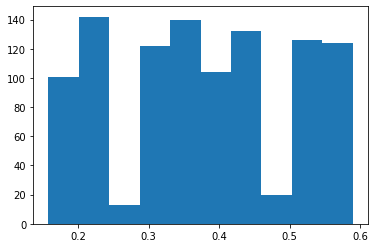

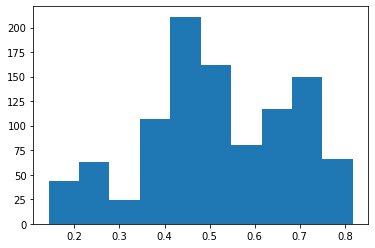

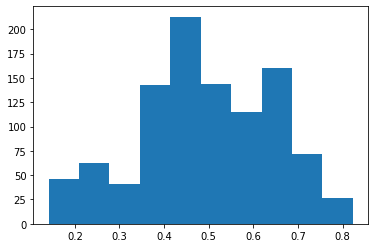

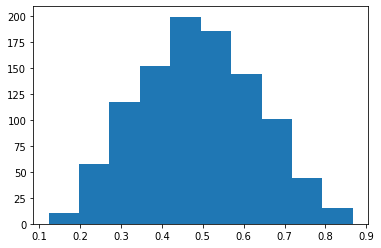

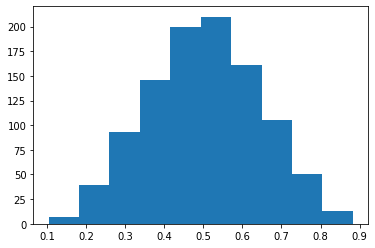

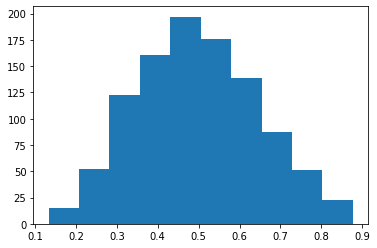

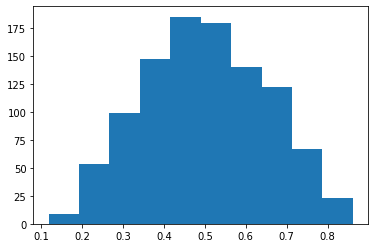

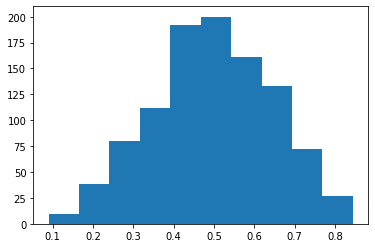

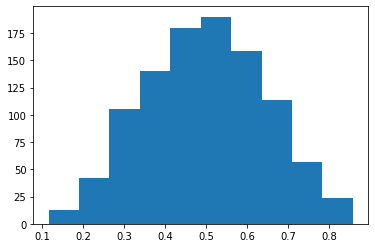

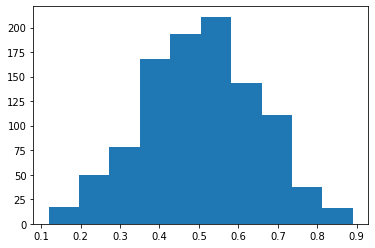

In [17]:
concentration_params = [10,100,10,10,10,10,100,10,10,10]

for i in range(10):
    N,K=10,i

    landscape = np.random.rand(N, 2**(K+1))
    bit_fits = bit_fitness(landscape,N,K)
    our_dirich = stats.dirichlet(concentration_params)

    fitnesses=[]
    for perm in itertools.product([0,1],repeat=N):
        fitnesses.append(get_fitness(perm, bit_fits, our_dirich))
    plt.hist(fitnesses)
    plt.show()
    